<p style='text-align: justify;'>
<b>Ejercicio 2:</b> Implemente una rutina de graficación que permita visualizar, para el caso de dos entradas, los patrones utilizados y la recta de separación que se va ajustando durante el entrenamiento del perceptrón simple. Utilice dicha rutina para visualizar el entrenamiento en los problemas OR y XOR. </p>

#### Librerías

In [48]:
import random
import numpy as np
import csv
import matplotlib.pyplot as plt
import time
import matplotlib.animation as animation

#### Entrenamiento
Obtenemos las *cant_e* entradas y la salida esperada para cada patrón a partir del archivo de texto *trn*.

In [49]:
trn = np.loadtxt('./data/OR_50_trn.csv',delimiter=',')

yd = [] # Salida esperadas
for i in range(len(trn)): 
    fila = trn[i]
    cant_e = len(fila) - 1 # Cantidad de entradas
    yd.append(fila[cant_e]) # Salidas esperadas
    aux = [-1]
    for j in range(cant_e):
        aux.append(fila[j])
    trn[i] = aux # Vector de entradas

Inicializamos al azar el vector de pesos, cuyo tamaño será la cantidad de entradas más uno (correspondiente al peso w0: sesgo o umbral de la neurona).

In [50]:
w = [] # Vector de pesos
for i in range(cant_e+1):
    aux = random.uniform(-0.5,0.5)
    w.append(aux)

Se realiza el algoritmo con dos criterios de parada: máximo de épocas (iteraciones) y porcentaje máximo de error. Se guardan los pesos finales registrados para cada época para su posterior graficación.

In [51]:
epoca = 0
epoca_max = 20 # Máximo de iteraciones
cont_error = 0
gamma = 0.1 # Velocidad de aprendizaje
errores = np.zeros(epoca_max)
perc_error_max = 0.02 # Porcentaje máximo de error
error_max = perc_error_max * len(trn) # Cantidad máxima de errores
w_saved = [] # Inicializo vector de pesos guardados

while (epoca < epoca_max):
    cont_error = 0
    for patron in range(len(trn)):
        x = trn[patron] # Entradas
        y = w @ x
        y = np.sign(y)

        error = yd[patron] - y
        if error != 0: cont_error += 1 

        # w_saved.append(w) # Guardo los pesos por patrón para cada época (más pesado)
        w = w + gamma*error*x # Corrijo pesos

    w_saved.append(w) # Guardo los pesos finales para esta epoca
    errores[epoca] = cont_error
    if cont_error < error_max: break
    epoca += 1

### Animación
Graficamos los puntos correspondientes a las entradas en el archivo de texto. De color azul se grafican aquellos cuya salida esperada es +1, mientras que de color rojo se grafican aquellos con salida esperada de -1. Además, graficamos la recta de separación y animamos los cambios en la misma dados por los pesos (que conforman sus coeficientes).

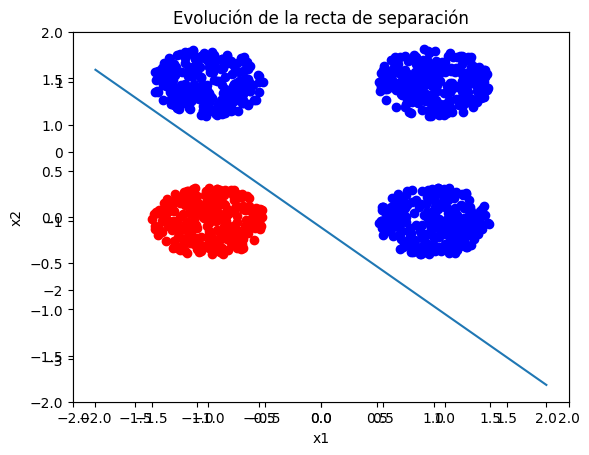

In [52]:
fig,ax = plt.subplots()
ax.set(xlim=[-2,2],ylim=[-2,2],xlabel='x1',ylabel='x2',title='Evolución de la recta de separación')
ax = fig.add_subplot()

# PUNTOS:
for i in range(len(trn)):
    if yd[i] == -1: # Según resultado esperado de la entrada:
        ax.scatter(trn[i,1], trn[i,2], color='red') 
    else:
        ax.scatter(trn[i,1], trn[i,2], color='blue') 

# RECTA:
x1 = np.linspace(-2, 2, 100)
w = w_saved[0][:]
recta = w[0]/w[2] - (w[1]/w[2])*x1 
line, = ax.plot(x1,recta)
def update(frame): # Actualizo la recta de separación
    w = w_saved[frame][:]
    recta = w[0]/w[2] - (w[1]/w[2])*x1
    line.set_ydata(recta)
    return line,

ani = animation.FuncAnimation(fig=fig,func=update,frames=len(w_saved),interval=20,repeat=False)
plt.show()

writergif = animation.PillowWriter(fps=20)
ani.save('./resultados/animacion.gif',writer=writergif)